### Sequence models with Poem

In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import csv
import json

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [8]:
data = '''In the town of Athy one Jeremy Lanigan\n
Battered away til he hadnt a pound.\n
His father died and made him a man again\n
Left him a farm and ten acres of ground.\n
He gave a grand party for friends and relations\n
Who didnt forget him when come to the wall,\n
And if youll but listen Ill make your eyes glisten\n
Of the rows and the ructions of Lanigans Ball.\n
Myself to be sure got free invitation,\n
For all the nice girls and boys I might ask,\n
And just in a minute both friends and relations\n
Were dancing round merry as bees round a cask.\n
Judy ODaly, that nice little milliner,\n
She tipped me a wink for to give her a call,\n
And I soon arrived with Peggy McGilligan\n
Just in time for Lanigans Ball.\n
There were lashings of punch and wine for the ladies,\n
Potatoes and cakes; there was bacon and tea,\n
There were the Nolans, Dolans, OGradys\n
Courting the girls and dancing away.\n
Songs they went round as plenty as water,\n
The harp that once sounded in Taras old hall,\n
Sweet Nelly Gray and The Rat Catchers Daughter,\n
All singing together at Lanigans Ball.\n
They were doing all kinds of nonsensical polkas\n
All round the room in a whirligig.\n
Julia and I, we banished their nonsense\n
And tipped them the twist of a reel and a jig.\n
Ach mavrone, how the girls got all mad at me\n
Danced til youd think the ceiling would fall.\n
For I spent three weeks at Brooks Academy\n
Learning new steps for Lanigans Ball.\n
Three long weeks I spent up in Dublin,\n
Three long weeks to learn nothing at all,\n
Three long weeks I spent up in Dublin,\n
Learning new steps for Lanigans Ball.\n
She stepped out and I stepped in again,\n
I stepped out and she stepped in again,\n
She stepped out and I stepped in again,\n
Learning new steps for Lanigans Ball.\n
Boys were all merry and the girls they were hearty\n
And danced all around in couples and groups,\n
Til an accident happened, young Terrance McCarthy\n
Put his right leg through miss Finnertys hoops.\n
Poor creature fainted and cried Meelia murther,\n
Called for her brothers and gathered them all.\n
Carmody swore that hed go no further\n
Til he had satisfaction at Lanigans Ball.\n
In the midst of the row miss Kerrigan fainted,\n
Her cheeks at the same time as red as a rose.\n
Some of the lads declared she was painted,\n
She took a small drop too much, I suppose.\n
Her sweetheart, Ned Morgan, so powerful and able,\n
When he saw his fair colleen stretched out by the wall,\n
Tore the left leg from under the table\n
And smashed all the Chaneys at Lanigans Ball.\n
Boys, oh boys, twas then there were runctions.\n
Myself got a lick from big Phelim McHugh.\n
I soon replied to his introduction\n
And kicked up a terrible hullabaloo.\n
Old Casey, the piper, was near being strangled.\n
They squeezed up his pipes, bellows, chanters and all.\n
The girls, in their ribbons, they got all entangled\n
And that put an end to Lanigans Ball.'''

In [9]:
corpus = data.lower().split("\n")                   # making lower and sentences

In [12]:
corpus[:5]

['in the town of athy one jeremy lanigan',
 '',
 'battered away til he hadnt a pound.',
 '',
 'his father died and made him a man again']

In [18]:
corpus = [line for line in corpus if len(line)>0]

In [19]:
corpus[:5]

['in the town of athy one jeremy lanigan',
 'battered away til he hadnt a pound.',
 'his father died and made him a man again',
 'left him a farm and ten acres of ground.',
 'he gave a grand party for friends and relations']

In [40]:
len(corpus)                                         # 64 lines

64

In [22]:
oov_tok = "<OOV>"
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1         # total tokens + 1 for OOV

In [26]:
d = tokenizer.word_index                            # tokenizer.word_index is a dictionary of all words with indices
l = {'daughter', 'listen'}

{key:d[key] for key in l if key in d}               # just viewing some of the keys

{'daughter': 148, 'listen': 93}

In [27]:
total_words

264

In [28]:
# making n grams

input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]          # generate index for each word in sentence
    for i in range(1, len(token_list)):                         
          n_gram_sequence = token_list[:i+1]                      # create sequences for each line            
          input_sequences.append(n_gram_sequence)                 # eg - (3,10,23,5) => (3,10),(3,10,23),(3,10,23,5)

In [30]:
input_sequences[:13]

[[5, 3],
 [5, 3, 67],
 [5, 3, 67, 9],
 [5, 3, 67, 9, 68],
 [5, 3, 67, 9, 68, 69],
 [5, 3, 67, 9, 68, 69, 70],
 [5, 3, 67, 9, 68, 69, 70, 71],
 [72, 41],
 [72, 41, 21],
 [72, 41, 21, 22],
 [72, 41, 21, 22, 73],
 [72, 41, 21, 22, 73, 4],
 [72, 41, 21, 22, 73, 4, 74]]

In [31]:
# pad sequences 

max_sequence_len = max([len(x) for x in input_sequences])       # finding longest sentence, let if highest length is 4 and then pre pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))    # (0,0,3,10),(0,3,10,23),(3,10,23,5)

In [32]:
max_sequence_len

11

In [33]:
input_sequences[:13]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  3, 67],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  3, 67,  9],
       [ 0,  0,  0,  0,  0,  0,  5,  3, 67,  9, 68],
       [ 0,  0,  0,  0,  0,  5,  3, 67,  9, 68, 69],
       [ 0,  0,  0,  0,  5,  3, 67,  9, 68, 69, 70],
       [ 0,  0,  0,  5,  3, 67,  9, 68, 69, 70, 71],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 72, 41],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 72, 41, 21],
       [ 0,  0,  0,  0,  0,  0,  0, 72, 41, 21, 22],
       [ 0,  0,  0,  0,  0,  0, 72, 41, 21, 22, 73],
       [ 0,  0,  0,  0,  0, 72, 41, 21, 22, 73,  4],
       [ 0,  0,  0,  0, 72, 41, 21, 22, 73,  4, 74]], dtype=int32)

In [44]:
len(input_sequences[0])

11

In [34]:
# create predictors and label
# predictors will be all but the last word from the padded input sequence
# labels will be the last word from the padded input sequence

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]       # x = (0,0,3) y = (10), x = (0,3,10) y = (23), x = (3,10,23) y = (5)

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)     # one hot encoding of labels

In [35]:
xs[:13]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  3, 67],
       [ 0,  0,  0,  0,  0,  0,  5,  3, 67,  9],
       [ 0,  0,  0,  0,  0,  5,  3, 67,  9, 68],
       [ 0,  0,  0,  0,  5,  3, 67,  9, 68, 69],
       [ 0,  0,  0,  5,  3, 67,  9, 68, 69, 70],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 72],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 72, 41],
       [ 0,  0,  0,  0,  0,  0,  0, 72, 41, 21],
       [ 0,  0,  0,  0,  0,  0, 72, 41, 21, 22],
       [ 0,  0,  0,  0,  0, 72, 41, 21, 22, 73],
       [ 0,  0,  0,  0, 72, 41, 21, 22, 73,  4]], dtype=int32)

In [45]:
len(xs[0])

10

In [51]:
len(labels)

453

In [50]:
len(ys[0])

264

In [36]:
labels[:13]

array([ 3, 67,  9, 68, 69, 70, 71, 41, 21, 22, 73,  4, 74], dtype=int32)

In [37]:
ys[:13]           # encoded labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
corpus[0]

'in the town of athy one jeremy lanigan'

In [39]:
# checking indexes of 1st sentence

print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

5
3
67
9
68
69
70
71


In [49]:
print(input_sequences[5])
print(labels[5])
print()
print(xs[5])
print(ys[5])

[ 0  0  0  0  5  3 67  9 68 69 70]
70

[ 0  0  0  0  5  3 67  9 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [52]:
embedding_dim = 64                                                              # randomly embedding to 64 dimensions
num_classes = total_words

In [53]:
model = Sequential([
    layers.Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=max_sequence_len-1),
    layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(num_classes, activation='softmax')
])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            16896     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 264)               17160     
Total params: 58,888
Trainable params: 58,888
Non-trainable params: 0
_________________________________________________________________


In [55]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.01)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [56]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [59]:
early_stopping    = EarlyStopping(monitor='loss', patience=10)
reduce_lr         = ReduceLROnPlateau(monitor='loss', patience=10, min_lr=0.001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='loss', filepath='./best_model.h5', save_best_only=True)

In [60]:
epochs = 350
callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [61]:
history = model.fit(xs,
                    ys,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/350
15/15 [==============================] - 9s 10ms/step - loss: 5.5097 - accuracy: 0.0353
Epoch 2/350
15/15 [==============================] - 0s 10ms/step - loss: 5.1219 - accuracy: 0.0552
Epoch 3/350
15/15 [==============================] - 0s 10ms/step - loss: 4.7762 - accuracy: 0.0640
Epoch 4/350
15/15 [==============================] - 0s 10ms/step - loss: 4.2896 - accuracy: 0.0993
Epoch 5/350
15/15 [==============================] - 0s 10ms/step - loss: 3.7606 - accuracy: 0.1744
Epoch 6/350
15/15 [==============================] - 0s 10ms/step - loss: 3.2201 - accuracy: 0.2848
Epoch 7/350
15/15 [==============================] - 0s 10ms/step - loss: 2.6608 - accuracy: 0.3422
Epoch 8/350
15/15 [==============================] - 0s 9ms/step - loss: 2.2366 - accuracy: 0.4393
Epoch 9/350
15/15 [==============================] - 0s 10ms/step - loss: 1.8320 - accuracy: 0.5408
Epoch 10/350
15/15 [==============================] - 0s 10ms/step - loss: 1.5786 - accuracy: 0.6115


In [62]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

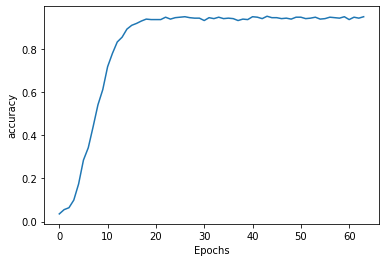

In [63]:
plot_graphs(history, 'accuracy')

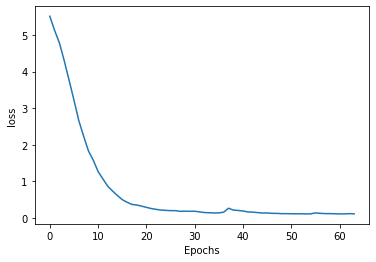

In [64]:
plot_graphs(history, 'loss')

In [66]:
seed_text = "Laurence went to dublin"
next_words = 50                        # predicting next 50 words
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)          # will give the index of the word most likely to be the next word in sequence
    output_word = ""
    for word, index in tokenizer.word_index.items():                  # checking the actual words mapped against the word index
        if index == predicted:
          output_word = word
          break
    seed_text += " " + output_word
print(seed_text)

Laurence went to dublin twist of a reel and a jig jig jig both to relations relations a jig ladies ladies ladies ladies ladies call her a call runctions runctions runctions were all merry and the girls they were hearty hearty hearty hearty were all merry and merry as the girls they were hearty


## Bigger corpus

In [67]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /content/irish-lyrics-eof.txt

--2021-10-19 06:46:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.182.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/content/irish-lyrics-eof.txt’

/content/irish-lyri 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-10-19 06:46:59 (83.8 MB/s) - ‘/content/irish-lyrics-eof.txt’ saved [68970/68970]



In [68]:
data = open('/content/irish-lyrics-eof.txt').read()

In [72]:
data[:50]

'Come all ye maidens young and fair\nAnd you that ar'

In [73]:
len(data)

68953

In [74]:
corpus = data.lower().split("\n")

In [76]:
corpus[:5]

['come all ye maidens young and fair',
 'and you that are blooming in your prime',
 'always beware and keep your garden fair',
 'let no man steal away your thyme',
 'for thyme it is a precious thing']

In [75]:
len(corpus)

1693

In [77]:
oov_tok = "<OOV>"
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

In [80]:
d = tokenizer.word_index                            # tokenizer.word_index is a dictionary of all words with indices
l = {'awake', 'playing'}

{key:d[key] for key in l if key in d}               # just viewing some of the keys

{'awake': 944, 'playing': 971}

In [81]:
total_words

2691

In [82]:
# making n grams

input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]          # generate index for each word in sentence
    for i in range(1, len(token_list)):                         
          n_gram_sequence = token_list[:i+1]                      # create sequences for each line            
          input_sequences.append(n_gram_sequence)                 # eg - (3,10,23,5) => (3,10),(3,10,23),(3,10,23,5)

In [83]:
input_sequences[:13]

[[52, 13],
 [52, 13, 97],
 [52, 13, 97, 1218],
 [52, 13, 97, 1218, 49],
 [52, 13, 97, 1218, 49, 3],
 [52, 13, 97, 1218, 49, 3, 70],
 [3, 12],
 [3, 12, 16],
 [3, 12, 16, 32],
 [3, 12, 16, 32, 362],
 [3, 12, 16, 32, 362, 9],
 [3, 12, 16, 32, 362, 9, 25],
 [3, 12, 16, 32, 362, 9, 25, 1219]]

In [84]:
# pad sequences 

max_sequence_len = max([len(x) for x in input_sequences])       # finding longest sentence, let if highest length is 4 and then pre pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))    # (0,0,3,10),(0,3,10,23),(3,10,23,5)

In [85]:
max_sequence_len

16

In [87]:
input_sequences[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   52,   13],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   52,   13,   97],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   52,   13,   97, 1218],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          52,   13,   97, 1218,   49],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   52,
          13,   97, 1218,   49,    3],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   52,   13,
          97, 1218,   49,    3,   70],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    3,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    3,   12,   16],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    3,   

In [88]:
len(input_sequences[0])

16

In [89]:
# create predictors and label
# predictors will be all but the last word from the padded input sequence
# labels will be the last word from the padded input sequence

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]       # x = (0,0,3) y = (10), x = (0,3,10) y = (23), x = (3,10,23) y = (5)

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)     # one hot encoding of labels

In [90]:
print(input_sequences[5])
print(labels[5])
print()
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   52   13   97 1218   49
    3   70]
70

[   0    0    0    0    0    0    0    0    0   52   13   97 1218   49
    3]
[0. 0. 0. ... 0. 0. 0.]


In [91]:
embedding_dim = 100                                                              # randomly embedding to 100 dimensions
num_classes = total_words

In [94]:
model = Sequential([
    layers.Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=max_sequence_len-1),
    layers.Bidirectional(layers.LSTM(150)),
    layers.Dense(num_classes, activation='softmax')
])

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 100)           269100    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_2 (Dense)              (None, 2691)              809991    
Total params: 1,380,291
Trainable params: 1,380,291
Non-trainable params: 0
_________________________________________________________________


In [96]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.01)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [97]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [98]:
early_stopping    = EarlyStopping(monitor='loss', patience=10)
reduce_lr         = ReduceLROnPlateau(monitor='loss', patience=10, min_lr=0.001, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='loss', filepath='./best_model.h5', save_best_only=True)

In [99]:
epochs = 100
callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [100]:
history = model.fit(xs,
                    ys,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/100
377/377 [==============================] - 10s 17ms/step - loss: 6.6747 - accuracy: 0.0703
Epoch 2/100
377/377 [==============================] - 7s 17ms/step - loss: 5.8626 - accuracy: 0.1030
Epoch 3/100
377/377 [==============================] - 7s 17ms/step - loss: 5.0637 - accuracy: 0.1489
Epoch 4/100
377/377 [==============================] - 7s 17ms/step - loss: 4.1829 - accuracy: 0.2139
Epoch 5/100
377/377 [==============================] - 7s 18ms/step - loss: 3.3536 - accuracy: 0.3056
Epoch 6/100
377/377 [==============================] - 6s 17ms/step - loss: 2.6790 - accuracy: 0.4085
Epoch 7/100
377/377 [==============================] - 6s 17ms/step - loss: 2.1729 - accuracy: 0.4998
Epoch 8/100
377/377 [==============================] - 6s 17ms/step - loss: 1.7912 - accuracy: 0.5724
Epoch 9/100
377/377 [==============================] - 6s 16ms/step - loss: 1.4833 - accuracy: 0.6422
Epoch 10/100
377/377 [==============================] - 6s 16ms/step - loss: 1.28

In [101]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

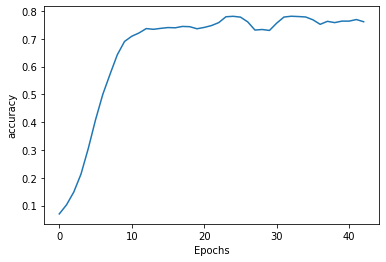

In [102]:
plot_graphs(history, 'accuracy')

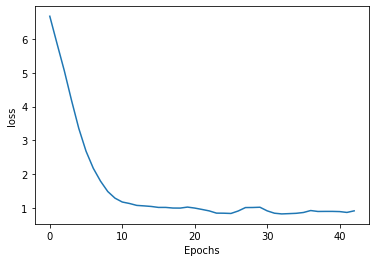

In [103]:
plot_graphs(history, 'loss')

In [106]:
seed_text = "I've got a bad feeling about this"
next_words = 50
  
for _ in range(next_words):
		token_list = tokenizer.texts_to_sequences([seed_text])[0]
		token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
		predicted = np.argmax(model.predict(token_list), axis=-1)
		output_word = ""
		for word, index in tokenizer.word_index.items():
				if index == predicted:
						output_word = word
						break
		seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this bright eyes like an like an odd and even roam in the juice of the door and broken hearted round mountain all the dew on the rocky road to dublin and the blood said she turned homeward will most beautiful rose to come when the gone and the gone and


## Exercise 12 - BiLSTM

In [107]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /content/sonnets.txt

--2021-10-19 07:05:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/content/sonnets.txt’

/content/sonnets.tx 100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-10-19 07:05:10 (80.4 MB/s) - ‘/content/sonnets.txt’ saved [93578/93578]



In [108]:
data = open('/content/sonnets.txt').read()

In [110]:
data[:50]

'FROM fairest creatures we desire increase,\nThat th'

In [111]:
len(data)

93578

In [112]:
corpus = data.lower().split("\n")

In [113]:
corpus[:5]

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,']

In [114]:
len(corpus)

2159

In [115]:
oov_tok = "<OOV>"
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

In [116]:
total_words

3212

In [117]:
# making n grams

input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]          # generate index for each word in sentence
    for i in range(1, len(token_list)):                         
          n_gram_sequence = token_list[:i+1]                      # create sequences for each line            
          input_sequences.append(n_gram_sequence)                 # eg - (3,10,23,5) => (3,10),(3,10,23),(3,10,23,5)

In [118]:
# pad sequences 

max_sequence_len = max([len(x) for x in input_sequences])       # finding longest sentence, let if highest length is 4 and then pre pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))    # (0,0,3,10),(0,3,10,23),(3,10,23,5)

In [119]:
max_sequence_len

11

In [120]:
# create predictors and label
# predictors will be all but the last word from the padded input sequence
# labels will be the last word from the padded input sequence

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]       # x = (0,0,3) y = (10), x = (0,3,10) y = (23), x = (3,10,23) y = (5)

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)     # one hot encoding of labels

In [122]:
len(ys)

15462

In [124]:
len(xs)

15462

In [123]:
len(ys[0])

3212

In [121]:
print(input_sequences[5])
print(labels[5])
print()
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   0   9 879]
879

[0 0 0 0 0 0 0 0 0 9]
[0. 0. 0. ... 0. 0. 0.]


In [155]:
embedding_dim = 150                                                              # randomly embedding to 150 dimensions
num_classes = total_words

In [185]:
model = Sequential([
    layers.Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=max_sequence_len-1),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.3),
    layers.Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(num_classes, activation='softmax')
])

In [186]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 10, 150)           481800    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 128)               110080    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1606)              207174    
_________________________________________________________________
dense_20 (Dense)             (None, 3212)              5161684   
Total params: 5,960,738
Trainable params: 5,960,738
Non-trainable params: 0
_________________________________________________________________


In [187]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.001)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [188]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [189]:
early_stopping    = EarlyStopping(monitor='loss', patience=10)
model_checkpoint  = ModelCheckpoint(monitor='loss', filepath='./best_model.h5', save_best_only=True)

In [190]:
epochs = 150
callbacks = [early_stopping, model_checkpoint]

In [191]:
history = model.fit(xs,
                    ys,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/150
484/484 [==============================] - 34s 18ms/step - loss: 6.9434 - accuracy: 0.0218
Epoch 2/150
484/484 [==============================] - 9s 18ms/step - loss: 6.5057 - accuracy: 0.0229
Epoch 3/150
484/484 [==============================] - 9s 18ms/step - loss: 6.4111 - accuracy: 0.0254
Epoch 4/150
484/484 [==============================] - 8s 18ms/step - loss: 6.2945 - accuracy: 0.0334
Epoch 5/150
484/484 [==============================] - 9s 18ms/step - loss: 6.1852 - accuracy: 0.0378
Epoch 6/150
484/484 [==============================] - 8s 17ms/step - loss: 6.0746 - accuracy: 0.0415
Epoch 7/150
484/484 [==============================] - 8s 17ms/step - loss: 5.9609 - accuracy: 0.0445
Epoch 8/150
484/484 [==============================] - 8s 17ms/step - loss: 5.8331 - accuracy: 0.0527
Epoch 9/150
484/484 [==============================] - 8s 17ms/step - loss: 5.7145 - accuracy: 0.0581
Epoch 10/150
484/484 [==============================] - 8s 17ms/step - loss: 5.59

In [192]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

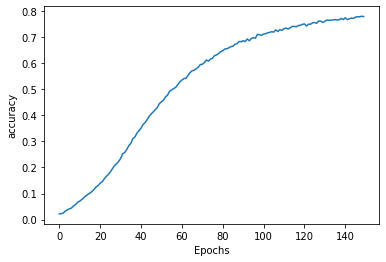

In [193]:
plot_graphs(history, 'accuracy')

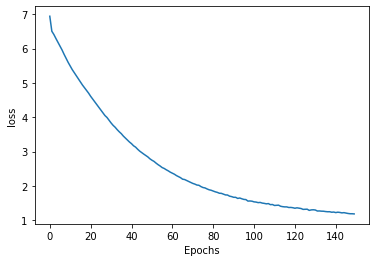

In [194]:
plot_graphs(history, 'loss')

In [195]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 50
  
for _ in range(next_words):
		token_list = tokenizer.texts_to_sequences([seed_text])[0]
		token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
		predicted = np.argmax(model.predict(token_list), axis=-1)
		output_word = ""
		for word, index in tokenizer.word_index.items():
				if index == predicted:
						output_word = word
						break
		seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of such grace be thee be away the world ' go had bright nor took them to thee took thy part thy face survey best to remedy keep young tongue shade affords loss to thee wit much pleasing ocean be forgot so blessed fair to yore stand made to thine


## Exercise 12 - Stacked LSTM

In [196]:
embedding_dim = 150                                                              # randomly embedding to 150 dimensions
num_classes = total_words

In [211]:
model = Sequential([
    layers.Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=max_sequence_len-1),
    layers.Bidirectional(layers.LSTM(64, return_sequences = True)),
    layers.Dropout(0.3),
    layers.LSTM(32),
    layers.Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(num_classes, activation='softmax')
])

In [212]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 10, 150)           481800    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 10, 128)           110080    
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 32)                20608     
_________________________________________________________________
dense_27 (Dense)             (None, 1606)              52998     
_________________________________________________________________
dense_28 (Dense)             (None, 3212)              5161684   
Total params: 5,827,170
Trainable params: 5,827,170
Non-trainable params: 0
___________________________________________

In [214]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.001)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [215]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [216]:
early_stopping    = EarlyStopping(monitor='loss', patience=10)
model_checkpoint  = ModelCheckpoint(monitor='loss', filepath='./best_model.h5', save_best_only=True)

In [217]:
epochs = 150
callbacks = [early_stopping, model_checkpoint]

In [218]:
history = model.fit(xs,
                    ys,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/150
484/484 [==============================] - 61s 21ms/step - loss: 6.8507 - accuracy: 0.0200
Epoch 2/150
484/484 [==============================] - 10s 21ms/step - loss: 6.4941 - accuracy: 0.0212
Epoch 3/150
484/484 [==============================] - 10s 21ms/step - loss: 6.3961 - accuracy: 0.0270
Epoch 4/150
484/484 [==============================] - 10s 21ms/step - loss: 6.2779 - accuracy: 0.0298
Epoch 5/150
484/484 [==============================] - 10s 21ms/step - loss: 6.1809 - accuracy: 0.0366
Epoch 6/150
484/484 [==============================] - 10s 21ms/step - loss: 6.1043 - accuracy: 0.0380
Epoch 7/150
484/484 [==============================] - 10s 21ms/step - loss: 6.0324 - accuracy: 0.0399
Epoch 8/150
484/484 [==============================] - 10s 21ms/step - loss: 5.9636 - accuracy: 0.0438
Epoch 9/150
484/484 [==============================] - 10s 21ms/step - loss: 5.8926 - accuracy: 0.0480
Epoch 10/150
484/484 [==============================] - 10s 21ms/step - l

In [219]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

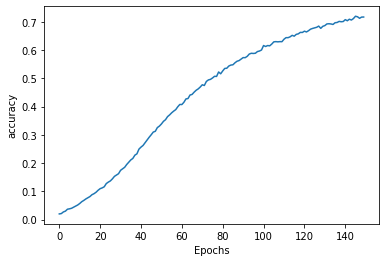

In [220]:
plot_graphs(history, 'accuracy')

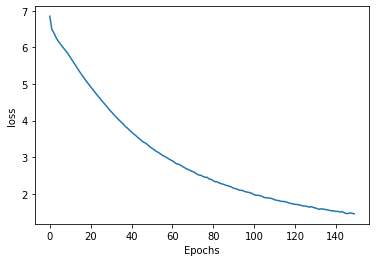

In [221]:
plot_graphs(history, 'loss')